In [4]:
import pandas as pd
import numpy as np
%matplotlib inline
pd.set_option('display.max_columns', 500) 

from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

from os.path import expanduser

In [5]:
iP = expanduser('~') + '/'
url = 'https://covidtracking.com/api/v1/states/daily.csv'
d1=pd.read_csv(url)
d1.date = d1.date.astype(int)
d1.total = d1.positive + d1.negative  #ignoring total column in file - that includes pending results and doesnt seem to be managed

In [6]:
def plotDiff(tot, title='', kind='bar', color='r'):
    (tot - tot.shift(1)).plot(title = title, kind = kind, color=color)

In [7]:
def plotState(d1, state, color):
    import matplotlib.pyplot as plt
    plotDiff(d1.loc[d1.state.isin([state])].groupby(['date']).sum()['positive'], title=f'{state} daily Positive', color=color)
    plt.show()
    plotDiff(d1.loc[d1.state.isin([state])].groupby(['date']).sum()['total'], title=f'{state} daily Tests', color=color)
    plt.show()

In [10]:
def addPctEnd(d1):
    dm=d1.date.max()
    d2=d1.loc[d1.date==dm]
    d2=d2[['state','positive']]
    d2.set_index(['state'],inplace=True)
    d2.head()
    dH=d2.to_dict()['positive']
    d1['PLatest']=d1.state.map(dH)
    d1['pctLatest']=d1.positive/d1.PLatest
    return d1

def clean(d1):
    d1=d1.fillna(0)
    d1.date = pd.to_datetime(d1.date, format='%Y%m%d').dt.date
    d1['posFrac']=d1.positive*100/(d1.total+1)
    return addPctEnd(d1)

d1=clean(d1)

In [11]:
d1.tail()

,date,state,positive,negative,pending,hospitalizedCurrently,hospitalizedCumulative,inIcuCurrently,inIcuCumulative,onVentilatorCurrently,onVentilatorCumulative,recovered,hash,dateChecked,death,hospitalized,total,totalTestResults,posNeg,fips,deathIncrease,hospitalizedIncrease,negativeIncrease,positiveIncrease,totalTestResultsIncrease,posFrac,PLatest,pctLatest
1704,2020-03-04,OR,3.0,29.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d63f4cf486a6d2f86062b9af1bd46955abd90cb9,2020-03-04T21:00:00Z,0.0,0.0,32.0,32,32,41,0.0,0.0,0.0,0.0,0.0,9.090909,999.0,0.003003
1705,2020-03-04,SC,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,012fa30a9958580f589eb7d1de5e5a81c327b1a5,2020-03-04T21:00:00Z,0.0,0.0,5.0,5,5,45,0.0,0.0,0.0,0.0,0.0,0.000000,2049.0,0.000000
1706,2020-03-04,TX,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,d29839e81cae6ba53df2d1a1d7bfeddfd4fc8509,2020-03-04T21:00:00Z,0.0,0.0,0.0,1,1,48,0.0,0.0,0.0,0.0,0.0,100.000000,6812.0,0.000147
1707,2020-03-04,WA,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,e07bd12171fed21351784c462b0dab23d8cfabbd,2020-03-04T21:00:00Z,10.0,0.0,0.0,39,39,53,0.0,0.0,0.0,0.0,0.0,3900.000000,7591.0,0.005138
1708,2020-03-04,WI,1.0,19.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,c1fede94be9a426dc9c3b5d26d33b9f168fec21c,2020-03-04T21:00:00Z,0.0,0.0,20.0,20,20,55,0.0,0.0,0.0,0.0,0.0,4.761905,2267.0,0.000441


In [12]:
def plotMultStates(df, states, col, title, kind='bar', diff=False):
    import matplotlib.pyplot as plt
    %matplotlib inline
    nf = len(states)+1
    nrows= nf
    c1=['date','state',col]
    plt.figure()
    dfU=df[c1].groupby('date').sum()[col]
    if diff:
        (dfU - dfU.shift(1)).plot(title = 'US ' + title, kind = kind)
    else: 
        dfU.plot( title='US ' + title, kind=kind)
    plt.show()
    nf=1
    for s in states:
        df1=df.loc[df.state.isin([s])][c1].groupby('date').sum()[col]
        #print(df1)
        plt.figure()
        if diff:
            (df1 - df1.shift(1)).plot(title = f'{s} ' + title, kind = kind)
        else:
            df1.plot(title = f'{s} ' + title, kind=kind)
        plt.show()
        nf+=1
    plt.show()
    return
    
    
    

In [13]:
def plot2D1(dS1, c1, c2, title='', rot=90, kind2=None, fN=None, color1='crimson', color2='black', marker='d',
           loc1='upper left', loc2='upper left'):
    import matplotlib.pyplot as plt
    fig, ax1 = plt.subplots()

    data1 = dS1[c1]
    t = data1.index
    data2 = dS1[c2]
    b1 = ax1.bar(t, data1, color=color1, label=c1)
    #ax1.legend(loc=loc1)
    plt.xticks(rotation=rot)
    ax1.set_ylabel(c1, color=color1)
    ax1.tick_params(axis='y')
    first_legend = plt.legend(handles=[b1[0]], loc=loc1)
    first_legend.set_label(c1)
    ax = plt.gca().add_artist(first_legend)
    #ax.legend(c1)

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
    l1 = ax2.plot(t, data2, color=color2, marker=marker, linewidth=0)

    ax2.set_ylabel(c2)  # we already handled the x-label with ax1
    ax2.tick_params(axis='y')
    plt.title(title)
    fig.tight_layout()  # otherwise the right y-label is slightly clipped


    #plt.legend(handles=[l1[0]], loc=loc2)
    

def plot2B(dS1, c1, c2, title, rot=90, kind2=None, fN=None):   
    plt.figure()
    fig, ax = plt.subplots(1,1)
    #ax.set_xticks(ax.get_xticks()[::5])
    dS1[c1].plot(kind='bar', ax=ax,legend=True, title=title, rot=rot, sharex=True)
    if kind2 is None: 
        dS1[c2].plot(style='b*', secondary_y=True, ax=ax, legend=True, rot=rot, sharex=True)
        #print(dS1[c2].head())
        #print('hi')
    else:
        dS1[c2].plot(kind=kind2, legend=True, rot=rot, sharex=True)        
    #ax1[0].set_xticklabels(dS1.index)
    #ax1[1].set_xticklabels(dS1.index)   
    ax.set_xticklabels(dS1.index.get_level_values(0), rot=rot)
    if fN is not None:
        plt.savefig(fN, dpi=300)
    plt.show()

def plot2D(dS1, c1, c2, title='', rot=90, kind2=None, fN=None, color1='crimson', color2='black', marker='d',loc1='upper left',loc2='upper right'):
    return plot2D1(dS1, c1, c2, title, rot=rot, kind2=kind2, fN=fN, color1=color1, color2=color2, marker=marker, loc1=loc1, loc2=loc2)

def plot2C(x,y, rot=True, **kwargs):
    #ax.set_xticks(ax.get_xticks()[::5])
    x.plot(kind='bar', legend=True,  rot=rot, sharex=True)
    y.plot(style='b*', secondary_y=True, legend=True, rot=rot, sharex=True)
    
def qqplot(x, xt, **kwargs):  x.plot(**kwargs)



In [14]:
def plot2(dS1, c1, c2, title, rot=90, kind2=None, fN=None):
    import matplotlib.pyplot as plt
    #plt.figure()
    fig, ax1 = plt.subplots(2, figsize=(15, 10))
    #df.A.plot(legend=True, style='r', ax=axarr[0])
    #df.B.plot(ax=axarr[1], kind='bar', legend=True)
    dS1[c1].plot(kind='bar', ax=ax1[0],legend=True, title=title, rot=rot, sharex=True)
    if kind2 is None: 
        dS1[c2].plot(style='b*', ax=ax1[1], legend=True, rot=rot, sharex=True)
    else:
        dS1[c2].plot(kind=kind2, ax=ax1[1], legend=True, rot=rot, sharex=True)        
    ax1[0].set_ylabel(c1)
    ax1[1].set_ylabel(c2)
    #ax1[0].set_xticklabels(dS1.index)
    #ax1[1].set_xticklabels(dS1.index)   
    if fN is not None:
        plt.savefig(fN, dpi=300)
    plt.show()

def plotState1(d1, state, c1, title='', color='red', fN=None):
    import matplotlib.pyplot as plt
    f = plt.figure()
    ny=d1.loc[d1.state.isin([state])][['date',c1,'state']].groupby(['date','state']).sum().unstack('state')#.plot(title='NY Daily Cases',rot=90)
    ny=ny-ny.shift(1)
    ny.plot(kind='bar',color=color, rot=90, title=title, legend=False)
    if fN is not None:
        plt.savefig(fN, dpi=300)
    plt.show()
    return

def plotState2(d1, state, c1, c2, title='', color='red', fN=None):
    ny=d1.loc[d1.state.isin([state])][['date',c1, c2]].groupby(['date']).sum()#.unstack('State')#.plot(title='NY Daily Cases',rot=90)
    ny=ny-ny.shift(1)
    plot2D(ny, c1, c2, title, rot=90, kind2=None, fN=None, color1=color, color2='black', marker='d')
    return

In [15]:
#US Total tests by Date and Total Testing Positive
u1=d1.groupby('date').sum()
u1=(u1 - u1.shift(1))
u1['tests']=(u1.positive + u1.negative)
u1['positive %']=u1.positive*100/(u1.positive+u1.negative+1)
u1=u1[['tests','positive %']]
u1=u1.dropna()
u1.head()

,tests,positive %
date,,
2020-03-05,263.0,21.969697
2020-03-06,665.0,7.057057
2020-03-07,356.0,33.053221
2020-03-08,602.0,12.603648
2020-03-09,1199.0,13.916667


In [16]:
u1.tail()

,tests,positive %
date,,
2020-04-01,101122.0,25.842786
2020-04-02,117742.0,24.020961
2020-04-03,129114.0,25.472641
2020-04-04,226945.0,14.878870
2020-04-05,138243.0,19.207344


# Figure 2 - TESTS BY STATE

In [17]:
dS1=d1.loc[d1.date==d1.date.max()].groupby('state').sum()
dS1['positive %']=dS1['positive']*100/(dS1['positive']+dS1['negative']+1)
dS1['tests']=dS1['positive'] + dS1['negative']
dS1=dS1.sort_values('positive', ascending=False)
dS1=dS1[:19]
dS1=dS1[['tests','positive %']]
#dS1=dS1.sort_values('Tests', ascending=False)

<Figure size 432x288 with 0 Axes>

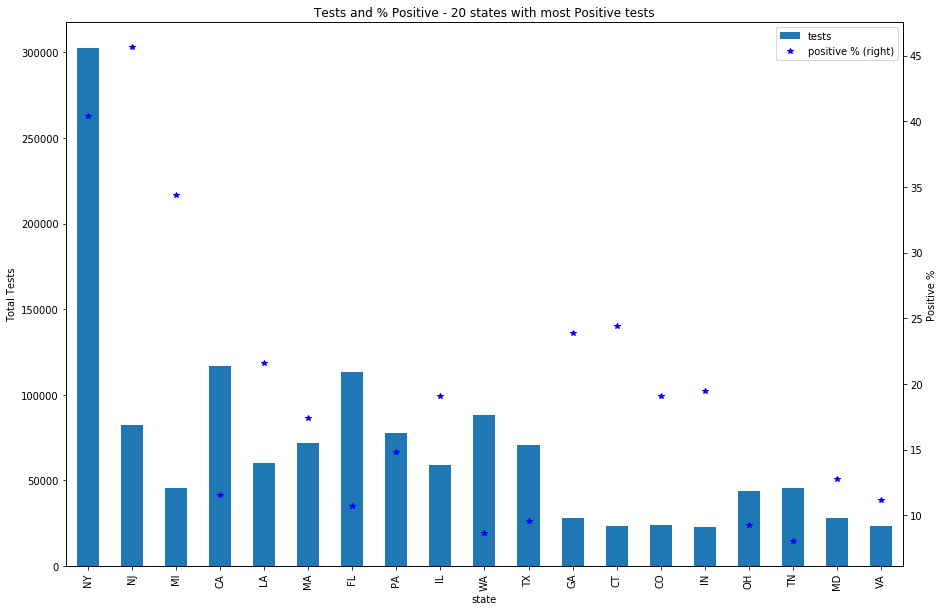

In [19]:
import matplotlib.pyplot as plt
plt.figure()
fig, ax1 = plt.subplots(figsize=(15, 10))
dS1['tests'].plot(kind='bar', legend=True, title='Tests and % Positive - 20 states with most Positive tests', rot=90)
dS1['positive %'].plot(style='b*', secondary_y=True, legend=True, rot=90)
ax1.set_ylabel('Total Tests')
ax1.right_ax.set_ylabel('Positive %')
fN=iP+'covid_fig2.png'
plt.savefig(fN, dpi=300)
plt.show()


# POSITIVES IN US

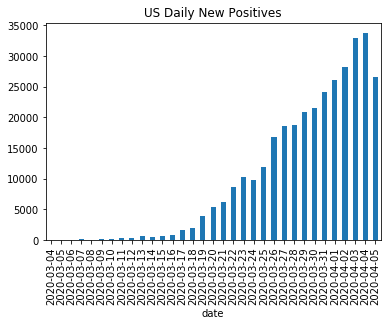

In [20]:
dU=d1.groupby('date').sum()['positive']
dU=dU-dU.shift(1)
import matplotlib.pyplot as plt
plt.figure()
dU.plot(kind='bar', title='US Daily New Positives')
fN=iP+'covid_fig3.png'
plt.savefig(fN, dpi=300)
plt.show()


In [21]:
dU.tail()

date
2020-04-01    26133.0
2020-04-02    28283.0
2020-04-03    32889.0
2020-04-04    33767.0
2020-04-05    26553.0
Name: positive, dtype: float64

# FIG 3.  Most Positives

In [22]:
dP=d1.loc[d1.date==d1.date.max()].groupby('state').sum()['positive']
dP=dP.sort_values(ascending=False)


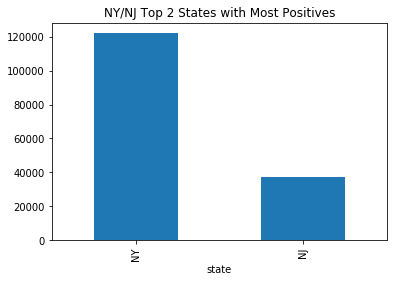

In [23]:
import matplotlib.pyplot as plt
plt.figure()
fN=iP+'covid_fig4.png'
dP[:2].plot(kind='bar',title = 'NY/NJ Top 2 States with Most Positives')
plt.savefig(fN, dpi=300)
plt.show()


In [24]:
dP[:2]

state
NY    122031.0
NJ     37505.0
Name: positive, dtype: float64

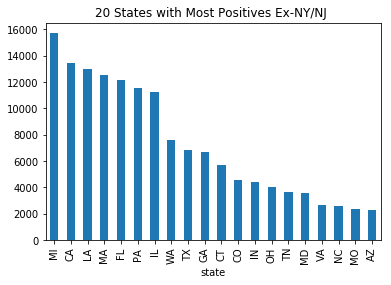

In [25]:
import matplotlib.pyplot as plt
plt.figure()
fN=iP+'covid_fig5.png'
dP[2:22].plot(kind='bar',title = '20 States with Most Positives Ex-NY/NJ ')
plt.savefig(fN, dpi=300)
plt.show()


# PENDING

In [26]:
dE=d1.loc[d1.date==d1.date.max()].groupby('state').sum()['pending']
dE=dE.sort_values(ascending=False)


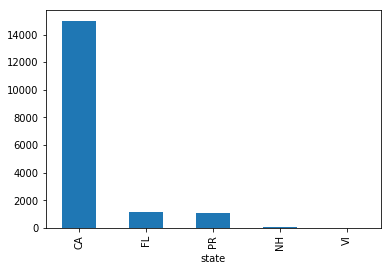

In [27]:
dE[:5].plot(kind='bar')

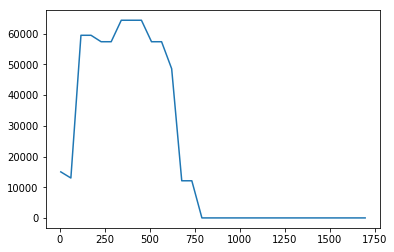

In [28]:
d1.loc[d1.state=='CA']['pending'].plot()

# Growth rate by State

<Figure size 432x288 with 0 Axes>

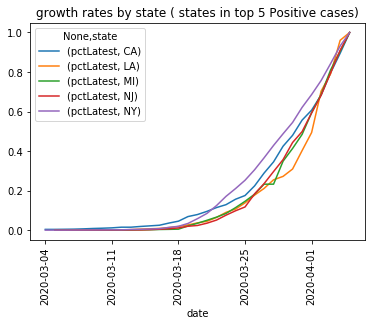

In [29]:
top5=dP.index.get_level_values(0)[:5]
n5=dP.index.get_level_values(0)[5:10]
plt.figure()
fN=iP+'covid_fig6.png'
d1.loc[d1.state.isin(top5)][['date','pctLatest','state']].groupby(['date','state']).sum().unstack('state').plot(title='growth rates by state ( states in top 5 Positive cases)',rot=90)
plt.savefig(fN, dpi=300)
plt.show()


<Figure size 432x288 with 0 Axes>

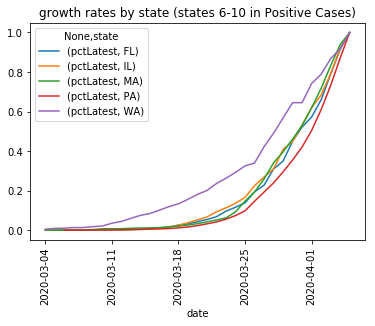

In [30]:
plt.figure()
fN=iP+'covid_fig7.png'
d1.loc[d1.state.isin(n5)][['date','pctLatest','state']].groupby(['date','state']).sum().unstack('state').plot(title='growth rates by state (states 6-10 in Positive Cases)',rot=90)
plt.savefig(fN, dpi=300)
plt.show()


In [31]:
st2Col={'NY':'crimson','WA':'goldenrod', 'CA': 'green', 'NJ': 'orange', 'LA': 'purple', 'MI': 'blue', 'IL': 'pink', 'GA': 'yellow'}


In [32]:
# STATE TESTS

In [33]:
f='Total'
for st in st2Col.keys():
    c=st2Col[st]
    plotState2(d1,st, f, 'positive', title='Daily ' +f+ ' and Positive Tests in ' + st, color=c, fN=iP+f'covid_fig8_{st}.png')

KeyError: "['Total'] not in index"

In [34]:
def getDailyData(d1):
    d2=d1[['date','state','positive','negative','pending','death','total']]
    d2=d2.sort_values(by=['state','date'])
    out=[]
    for s in np.unique(d2.state):
        d3=d2.loc[d2.state==s][['date','positive','negative','pending','death','total']]
        d3.set_index('date',inplace=True)
        d3=d3-d3.shift(1)
        d3['state']=s
        out.append(d3.dropna())
    return pd.concat(out)

dD=getDailyData(d1)
dD['results']=dD.positive + dD.negative
dD['posFrac']=dD.positive*100/(dD.results+1)
dD.reset_index(inplace=True)
dD.head()


,date,positive,negative,pending,death,total,state,results,posFrac
0,2020-03-07,0.0,4.0,1.0,0.0,4.0,AK,4.0,0.0
1,2020-03-08,0.0,2.0,4.0,0.0,2.0,AK,2.0,0.0
2,2020-03-09,0.0,9.0,3.0,0.0,9.0,AK,9.0,0.0
3,2020-03-10,0.0,0.0,0.0,0.0,0.0,AK,0.0,0.0
4,2020-03-11,0.0,23.0,5.0,0.0,23.0,AK,23.0,0.0


In [36]:
def getTopStates(d1,f='positive',n=10):
    d2=d1.loc[d1.date==d1.date.max()][['state',f]]
    d3=d2.sort_values(by=[f],ascending=False)
    return (d3.state[:n]).values

topPosStates = list(getTopStates(d1))
topDeathStates = list(getTopStates(d1,f='death'))



In [37]:
topPosStates

['NY', 'NJ', 'MI', 'CA', 'LA', 'MA', 'FL', 'PA', 'IL', 'WA']

# STATE DAILY POSITIVES

In [38]:

f='positive'
for st in st2Col.keys():
    c=st2Col[st]
    f1=iP+f'covid_fig13_{st}'
    plotState1(d1,st, f,title='Daily ' +f+ ' in ' + st, color=c, fN=f1)

NameError: name 'plotState1' is not defined

# DEATHS

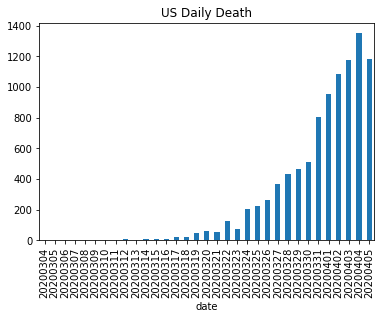

In [39]:
dU=d1.groupby('date').sum()['death']
dU1=d1.groupby('date').sum()[['total','death','positive']]
dU=dU-dU.shift(1)
plt.figure()
fN=iP+'covid_fig9.png'
dU.plot(kind='bar', title='US Daily Death')
plt.savefig(fN, dpi=300)
plt.show()


In [40]:
dU1=d1.groupby('date').sum()[['death','positive']]
dU1=dU1-dU1.shift(1)
#dU.plot(kind='bar', title='US Daily Death')
plot2(dU1[7:],'death','positive', title='US Daily Death and Positive Cases',rot=90)

NameError: name 'plot2' is not defined

# Deaths by State

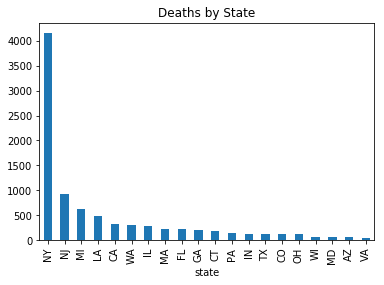

In [42]:
dD=d1.loc[d1.date==d1.date.max()].groupby('state').sum()['death']
dD=dD.sort_values(ascending=False)
plt.figure()
dD[:20].plot(kind='bar', title='Deaths by State')
plt.savefig(iP+'covid_fig10.png', dpi=300)
plt.show()


In [43]:
t5=dD.index.get_level_values(0)[:5]
t5

Index(['NY', 'NJ', 'MI', 'LA', 'CA'], dtype='object', name='state')

<Figure size 432x288 with 0 Axes>

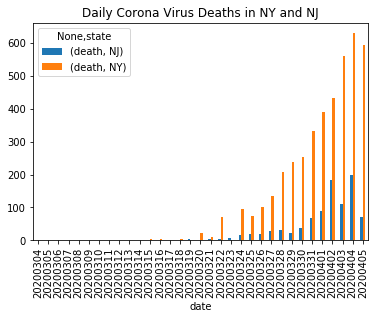

In [45]:
ny=d1.loc[d1.state.isin(['NY','NJ'])][['date','death','state']].groupby(['date','state']).sum().unstack('state')#.plot(title='NY Daily Cases',rot=90)
ny=ny-ny.shift(1)
plt.figure()
ny.plot(kind='bar', rot=90, title='Daily Corona Virus Deaths in NY and NJ', legend=True)
plt.savefig(iP+'covid_fig12.png', dpi=300)
plt.show()


<Figure size 432x288 with 0 Axes>

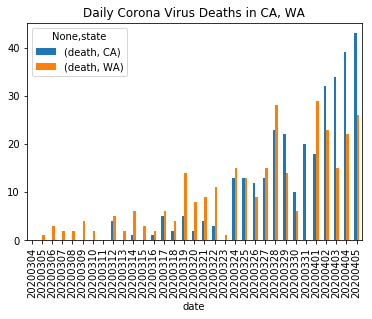

In [47]:
ny=d1.loc[d1.state.isin(['WA','CA'])][['date','death','state']].groupby(['date','state']).sum().unstack('state')#.plot(title='NY Daily Cases',rot=90)
ny=ny-ny.shift(1)
plt.figure()
ny.plot(kind='bar', rot=90, title='Daily Corona Virus Deaths in CA, WA', legend=True)
plt.savefig(iP+'covid_fig11.png', dpi=300)
plt.show()


<Figure size 432x288 with 0 Axes>

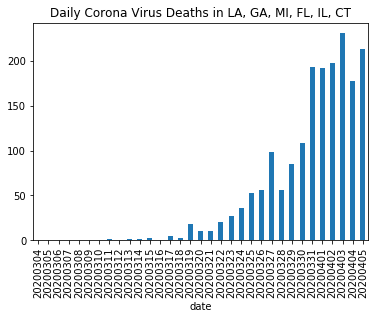

In [61]:
ny=d1.loc[d1.state.isin(['LA','GA','MI','FL','IL'])][['date','death','state']].groupby(['date']).sum()#.unstack('State')#.plot(title='NY Daily Cases',rot=90)
ny=ny-ny.shift(1)
plt.figure()
ny.plot(kind='bar', rot=90, title='Daily Corona Virus Deaths in LA, GA, MI, FL, IL, CT', legend=False)
plt.savefig(iP+'covid_fig13.png', dpi=300)
plt.show()


In [49]:
f='death'
for st in st2Col.keys():
    c=st2Col[st]
    plotState1(d1,st, f,title='Daily ' +f+ ' in ' + st, color=c, fN=iP + f'covid_fig14_{c}.png')

NameError: name 'plotState1' is not defined

# growth in last 5 days


In [52]:
def getGr(d1,thresh=1000,f='positive',b=-5):
    d2=d1.loc[d1.date==d1.date.max()]
    d3=d2.loc[d2[f]>thresh]
    d4=d1.sort_values(['state','date'])
    out=[]
    for s in d3.state:
        d5=d4.loc[d4.state==s]
        p5=d5[f].values[b]
        pn=d5[f].values[-1]
        g=np.power(pn/(p5+1),1.0/abs(b))-1
        dl=np.log(2.)/np.log(1+g)
        out.append([d1.date.max(),s,p5,pn,g, abs(b),dl])
    return pd.DataFrame(out,columns=['date','state','Pos Early','PosNow','DailyGrowth','look back','days2Double'])

dGro=getGr(d1)
dGro.sort_values(by=['DailyGrowth'],ascending='True',inplace=True)
dGro.set_index('state',inplace=True)

dGroD=getGr(d1, f='death', thresh=10)
dGroD.sort_values(by=['DailyGrowth'],ascending='True',inplace=True)
dGroD.set_index('state',inplace=True)


dGro10=getGr(d1,b=-11)
dGro10.sort_values(by=['DailyGrowth'],ascending='True',inplace=True)
dGro10.set_index('state',inplace=True)
 
    

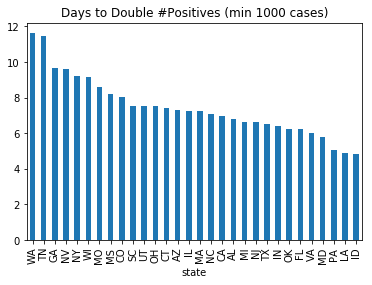

In [57]:
dGro['days2Double'].plot(kind='bar', title='Days to Double #Positives (min 1000 cases)')     


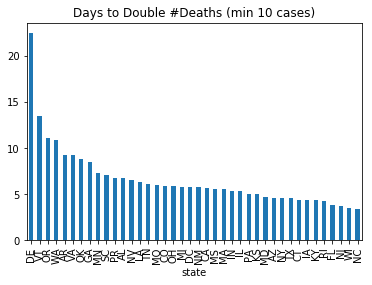

In [58]:
dGroD['days2Double'].plot(kind='bar', title='Days to Double #Deaths (min 10 cases)')     


In [59]:
#over last 11 days - since SIP began



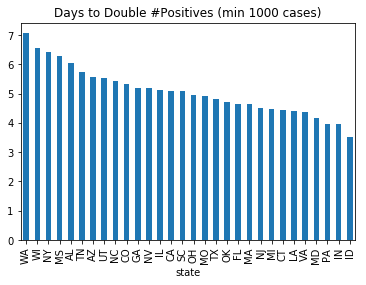

In [60]:
dGro10['days2Double'].plot(kind='bar', title='Days to Double #Positives (min 1000 cases)')   